In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('tiktok.csv', encoding='ISO-8859-1')
print (df.head())

       Celebrity  Followers Following  Likes  T.Videos  Video Duration  \
0     khaby.lame      162.7        79    2.4     12100              35   
1  charlidamelio      155.4     1.28K   11.7      2700              25   
2        mrbeast       98.0       350  954.7       352              55   
3    bellapoarch       94.2       635    2.3       721              17   
4      addisonre       88.8        21    5.8     17800              13   

   Average Views Net Worth(Million)  Most Viewed Video(Billion)  \
0            7.0                 75                       0.273   
1            9.8                 30                       0.234   
2           20.0                700                       0.250   
3            8.0                 16                       0.834   
4           17.6                  .                      53.000   

   Most Liked Video(Million)             Video Category  
0                       37.8         Comedy, life hacks  
1                       40.1       A

In [15]:
# Check for missing values
print(df.isnull().sum())

Celebrity                     0
Followers                     0
Following                     0
Likes                         0
T.Videos                      0
Video Duration                0
Average Views                 0
Net Worth(Million)            0
Most Viewed Video(Billion)    0
Most Liked Video(Million)     0
Video Category                0
dtype: int64


In [21]:
# Convert columns with 'K' or 'M' suffixes to numeric values
def convert_suffix(value):
    if isinstance(value, str) and 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif isinstance(value, str) and 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif value == '.':
        return np.nan
    else:
        return float(value)

df['Following'] = df['Following'].apply(convert_suffix)
df['Net Worth(Million)'] = df['Net Worth(Million)'].apply(convert_suffix)

# Check updated data types
print(df.dtypes)


Celebrity                      object
Followers                     float64
Following                     float64
Likes                         float64
T.Videos                        int64
Video Duration                  int64
Average Views                 float64
Net Worth(Million)            float64
Most Viewed Video(Billion)    float64
Most Liked Video(Million)     float64
Video Category                 object
dtype: object


In [25]:
# Summary statistics
print(df.describe())

        Followers    Following       Likes      T.Videos  Video Duration  \
count   47.000000    47.000000   47.000000     47.000000       47.000000   
mean    33.525532   134.255319  206.408511   2012.234043       32.617021   
std     39.241557   204.399382  280.911301   5752.360034        6.428717   
min      1.500000    10.000000    1.000000     60.000000       13.000000   
25%      4.750000    50.000000    5.450000    150.000000       30.000000   
50%     22.000000    80.000000   70.000000    250.000000       35.000000   
75%     46.500000   115.000000  250.000000    450.000000       35.000000   
max    162.700000  1280.000000  954.700000  27100.000000       55.000000   

       Average Views  Net Worth(Million)  Most Viewed Video(Billion)  \
count      47.000000           46.000000                   47.000000   
mean        7.544681           80.389130                    1.587468   
std         6.195749          177.185031                    7.683679   
min         1.500000       

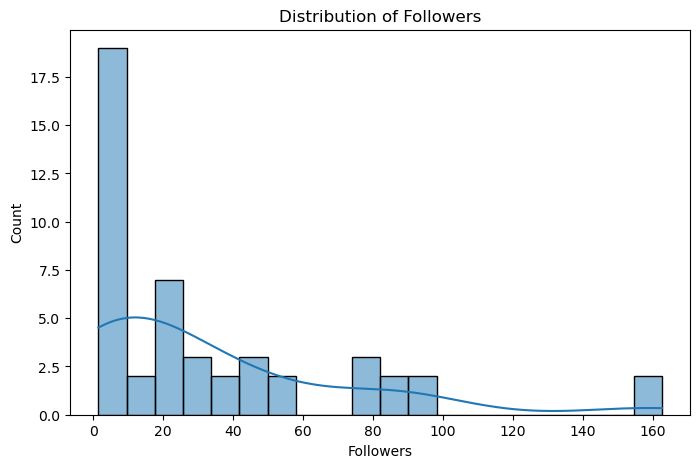

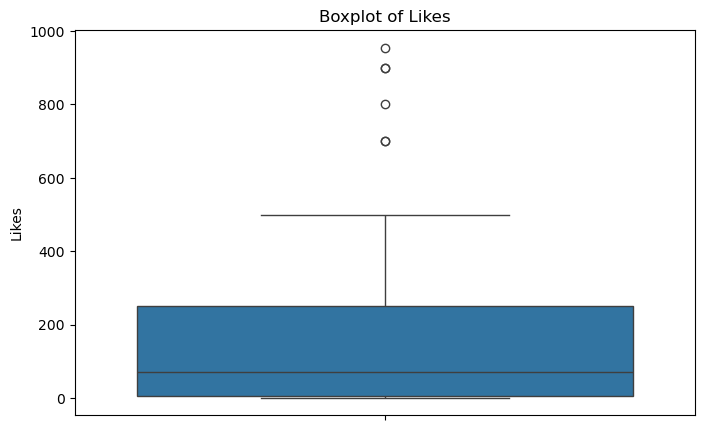

In [29]:
# Histogram for Followers
plt.figure(figsize=(8, 5))
sns.histplot(df['Followers'], bins=20, kde=True)
plt.title('Distribution of Followers')
plt.show()

# Boxplot for Likes
plt.figure(figsize=(8, 5))
sns.boxplot(df['Likes'])
plt.title('Boxplot of Likes')
plt.show()


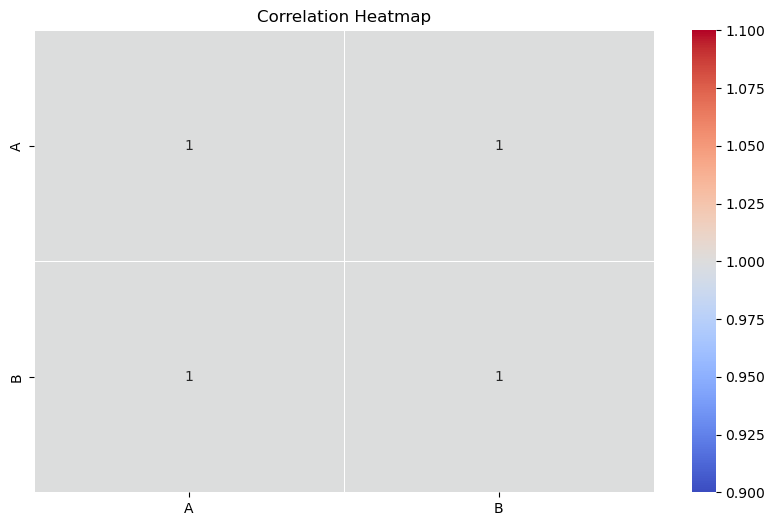

In [190]:
# Check for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('tiktok.csv', encoding='ISO-8859-1')

# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(data.head())

# Display column names
print("\nColumn names in the dataset:", data.columns)


First few rows of the dataset:
       Celebrity  Followers Following  Likes  T.Videos  Video Duration  \
0     khaby.lame      162.7        79    2.4     12100              35   
1  charlidamelio      155.4     1.28K   11.7      2700              25   
2        mrbeast       98.0       350  954.7       352              55   
3    bellapoarch       94.2       635    2.3       721              17   
4      addisonre       88.8        21    5.8     17800              13   

   Average Views Net Worth(Million)  Most Viewed Video(Billion)  \
0            7.0                 75                       0.273   
1            9.8                 30                       0.234   
2           20.0                700                       0.250   
3            8.0                 16                       0.834   
4           17.6                  .                      53.000   

   Most Liked Video(Million)             Video Category  
0                       37.8         Comedy, life hacks  
1    

In [39]:
# Convert 'Followers' and 'Likes' columns to numeric (replace with exact column names if different)
data['Followers'] = pd.to_numeric(data['Followers'], errors='coerce')
data['Likes'] = pd.to_numeric(data['Likes'], errors='coerce')

# Drop any rows where 'Followers' or 'Likes' is NaN after conversion
data.dropna(subset=['Followers', 'Likes'], inplace=True)

# Check the data types and summary statistics to confirm
print("\nData types after conversion:")
print(data[['Followers', 'Likes']].dtypes)
print("\nSummary statistics:")
print(data[['Followers', 'Likes']].describe())



Data types after conversion:
Followers    float64
Likes        float64
dtype: object

Summary statistics:
        Followers       Likes
count   47.000000   47.000000
mean    33.525532  206.408511
std     39.241557  280.911301
min      1.500000    1.000000
25%      4.750000    5.450000
50%     22.000000   70.000000
75%     46.500000  250.000000
max    162.700000  954.700000


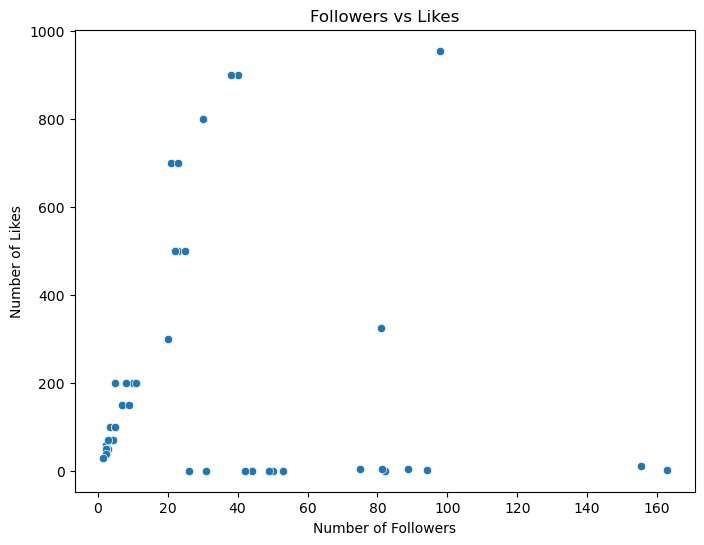

In [42]:
plt.figure(figsize=(8, 6))  # Set figure size

# Create the scatter plot, updating column names if necessary
sns.scatterplot(x='Followers', y='Likes', data=data)

# Set the title and axis labels
plt.title('Followers vs Likes')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')

# Display the plot
plt.show()
